# 信号处理仿真与应用 - 数字滤波
##  hampel
## 使用 Hampel 识别器去除离群值

**和MATLAB波形一致**

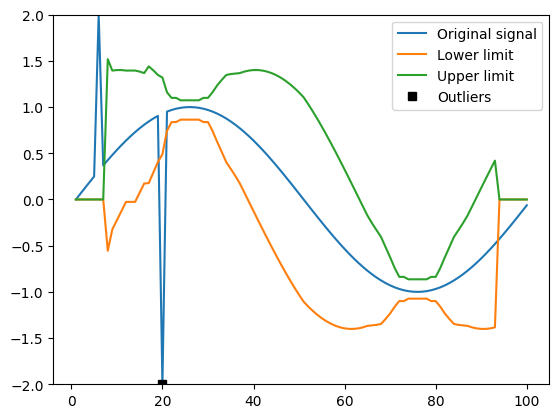

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def hampel(x, k=7, t0=3):
    n = len(x)
    y = np.copy(x)
    i = []
    xmedian = np.zeros(n)
    xsigma = np.zeros(n)
    
    for j in range(n):
        if j < k or j >= n - k:
            continue
        
        xk = x[j-k:j+k+1]
        median = np.median(xk)
        sigma = 1.4826 * np.median(np.abs(xk - median))
        
        if np.abs(x[j] - median) > t0 * sigma:
            y[j] = median
            i.append(j)
        
        xmedian[j] = median
        xsigma[j] = sigma
    
    return y, i, xmedian, xsigma

x = np.sin(2 * np.pi * np.arange(0, 100) / 100)
x[5] = 2
x[19] = -2

y, i, xmedian, xsigma = hampel(x)

n = np.arange(1, len(x) + 1)
plt.plot(n, x, label='Original signal')
plt.plot(n, xmedian - 3 * xsigma, label='Lower limit')
plt.plot(n, xmedian + 3 * xsigma, label='Upper limit')
plt.plot(np.array(i) + 1, x[np.array(i)], 'sk', label='Outliers')
plt.ylim(-2, 2)  # 设置纵轴范围
plt.legend()
plt.show()


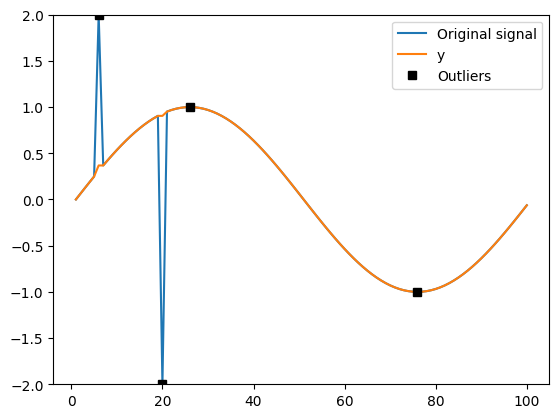

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def hampel(x, k=7, t0=3):
    n = len(x)
    y = np.copy(x)
    i = []
    xmedian = np.zeros(n)
    xsigma = np.zeros(n)
    
    for j in range(n):
        if j < k or j >= n - k:
            continue
        
        xk = x[j-k:j+k+1]
        median = np.median(xk)
        sigma = 1.4826 * np.median(np.abs(xk - median))
        
        if np.abs(x[j] - median) > t0 * sigma:
            y[j] = median
            i.append(j)
        
        xmedian[j] = median
        xsigma[j] = sigma
    
    return y, i, xmedian, xsigma

x = np.sin(2 * np.pi * np.arange(0, 100) / 100)
x[5] = 2
x[19] = -2

y, i, xmedian, xsigma = hampel(x,1)

n = np.arange(1, len(x) + 1)
plt.plot(n, x, label='Original signal')
plt.plot(n, y, label='filtered signal')
plt.plot(np.array(i) + 1, x[np.array(i)], 'sk', label='Outliers')
plt.ylim(-2, 2)  # 设置纵轴范围
plt.legend()
plt.show()
